# Lab-4 

Implement following feature extraction methods over the pre-processed text data

* TF-IDF
* Word2Vec
* Doc2Vec

#LAb8

Implement following classification approaches to evaluate the performance in terms of
various evaluation metrics such as Accuracy, Precision, Recall and F-Score.
* Decision Tree
* Naïve Bayes
* SVM
* MLP
* CNN
* LSTM
* GRU

In [ ]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import cohen_kappa_score

from sklearn.feature_extraction.text import TfidfVectorizer


from imblearn.over_sampling import SMOTE
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import io
import requests
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Downloading the imdb dataset

url = 'https://raw.githubusercontent.com/harshildarji/ML-Practise/master/IMDB%20Sentiment%20Classification%20using%20TF-IDF/datasets/data.csv'
_data = requests.get(url).content
data = pd.read_csv(io.StringIO(_data.decode('utf-8')))

In [ ]:
#Retrieving the size of dataset
data.shape

(49085, 2)

In [ ]:
#Visualizing first few reviews of the dataset
data.head()

,review,label
0,this was painful i made myself watch it until ...,0.0
1,once again mr costner has dragged out a movie ...,0.0
2,by strange coincidence i ve started to watch t...,0.0
3,well the hero and the terror is slightly below...,0.0
4,well the hero and the terror is slightly below...,0.0


Here, Label  **0.0**
  means **negative** sentiment, while  **1.0**
  means **positive** sentiment.

Now, let's check if our dataset contains any null values, if yes, drop those rows!

In [ ]:
#check if our dataset contains any null values
data.isnull().sum()

review    2
label     5
dtype: int64

In [ ]:
#Dropping the rows that contains any null values
data = data.dropna().reset_index(drop=True)

In [ ]:
#Ensuring that the dataset does not contain any null values after dropping them
data.isnull().sum()

review    0
label     0
dtype: int64

In [ ]:
#Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['label'], test_size = .5, shuffle = False)

In [ ]:
#Display the sizes of train adn test splits
len(X_train), len(y_train), len(X_test), len(y_test)

(24539, 24539, 24539, 24539)

In [ ]:
#Checking the class disctributions
sentiments = data['label'].value_counts()
print('Sentiments in entire dataset:\n Positive: {}\n Negative: {}'.format(sentiments[1], sentiments[0]))

Sentiments in entire dataset:
 Positive: 24536
 Negative: 24542


In [ ]:
#Defining a function useful in checking the class-wise disctributions
def get_sentiments(y, split_type):
    positive = (y==1).sum()
    negative = (y==0).sum()
    print('Sentiments in {}:\n Positive: {}\n Negative: {}'.format(split_type, positive, negative))

In [ ]:
#checking the class-wise disctributions in train and test splits
get_sentiments(y_train, 'Train data')
get_sentiments(y_test, 'Test data')

Sentiments in Train data:
 Positive: 12083
 Negative: 12456
Sentiments in Test data:
 Positive: 12453
 Negative: 12086


# **TF-IDF**
Now, as we all know, we cannot feed the text data to a classifier as it is. We should first convert these data into a numerical form known as vectors.

Here, we will use **TF-IDF** (**T**erm **F**requency–**I**nverse **Document** **F**requency), a numerical statistic that reflects how important a word is to a document in a collection or corpus by assigning some weight to it.

# **What is TF (term frequency)?**

Term frequency works by looking at the frequency of a particular term you are concerned with relative to the document. There are multiple measures, or ways, of defining frequency:

* Boolean frequency (e.g. 1 if the term occurs, or 0 if the term does not occur, in the document).

* Number of times the word appears in a document (raw count).

* Logarithmically scaled frequency (e.g. log(1 + raw count)).

* Term frequency adjusted for the length of the document (raw count of occurences divided by number of words in the document).

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).



# **What is IDF (inverse document frequency)?**

* Inverse document frequency looks at how common (or uncommon) a word is amongst the corpus.

* IDF is calculated as follows:  

* IDF algorithm: idf(t, D) = log( N / count(d ∈ D : t ∈ d) )

* IDF(t) = log(Total number of documents / Number of documents with term t in it)

    * where t is the term (word) we are looking to measure the commonness 
 
    * N is the number of documents (d) in the corpus (D)
 
    * The denominator is simply the number of documents in which the term, t, appears in


# **Computing TF-IDF**
tf_idf(t) = tf(t)*idf(t)

* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

* IDF(t) = log(Total number of documents / Number of documents with term t in it)





# Example for Computing TF-IDF:
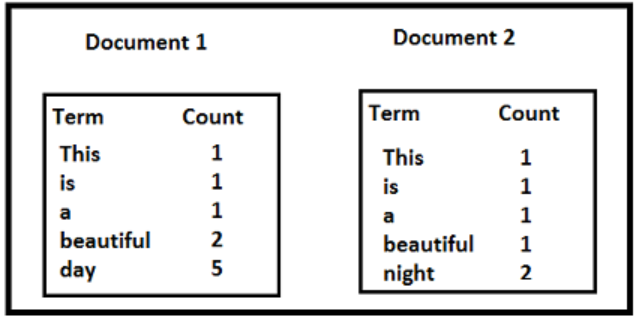


TF('beautiful',Document1) = 2/10, IDF('beautiful')=log(2/2) = 0

TF-IDF(‘beautiful’, Document1) = (2/10)*0 = 0

TF(‘day’,Document1) = 5/10,  IDF(‘day’)=log(2/1) = 0.30

TF-IDF(‘day’, Document1) = (5/10)*0.30 = 0.15


In [ ]:
# Defining a function for tokenize
def tokenize(text):
    return [word for word in word_tokenize(text.lower()) if word not in stopwords.words('english')]

In [ ]:
#Creating an instance of TfidfVectorizer class
vectorizer = TfidfVectorizer(tokenizer = tokenize)

Since our dataset contains in total  **49078**
  reviews, generating vectors will take a lot of time. Doing so every time will be a time-consuming task.

Therefore, once we generate vectors in the first run, we can store the **vocabulary** in a separate file. We can then use this saved vocabulary to **fit** our **train** and **test data** in future runs (of this program, of course!).



Sample code to achieve this is:

The following method will **initialize vectorizer** based on the chosen option.

def choose_vectorizer(option):

    if option == 'generate':

        vectorizer = TfidfVectorizer(tokenizer = tokenize)

    elif option == 'load':

        vectorizer = TfidfVectorizer(vocabulary = pickle.load(open('vocabulary.pkl', 'rb')))

    
    return vectorizer

%%time
options = ['generate', 'load']

Call the above method depending on the requirement

option = options[0] 

vectorizer = choose_vectorizer(option)

In [ ]:
print(X_train.shape)
X_test.shape


(24539,)


(24539,)

In [ ]:
#transform the train adn test data using TfidfVectorizer instance
vectorized_train_data = vectorizer.fit_transform(X_train[:500])
vectorized_test_data = vectorizer.transform(X_test[:500])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


We will use **Logistic Regression** classifier here

In [ ]:
print(X_train[0:5])


0    this was painful i made myself watch it until ...
1    once again mr costner has dragged out a movie ...
2    by strange coincidence i ve started to watch t...
3    well the hero and the terror is slightly below...
4    well the hero and the terror is slightly below...
Name: review, dtype: object


In [ ]:
print(vectorized_train_data[0:5])

  (0, 6548)	0.06788463435917662
  (0, 10699)	0.2744615861770934
  (0, 8579)	0.20634795918108023
  (0, 2131)	0.307091449401492
  (0, 7638)	0.2744615861770934
  (0, 4852)	0.24183172295269478
  (0, 10789)	0.23628709339722637
  (0, 1829)	0.307091449401492
  (0, 3851)	0.07548363337209668
  (0, 8250)	0.16725936113848242
  (0, 11070)	0.16052289724416322
  (0, 3365)	0.18120605720815
  (0, 8306)	0.2744615861770934
  (0, 7198)	0.28800420301155855
  (0, 6949)	0.1449769148756296
  (0, 7430)	0.11395975152530066
  (0, 5268)	0.18634660752841595
  (0, 173)	0.17806656463114653
  (0, 10020)	0.14543670140674791
  (0, 3509)	0.19264215835600226
  (0, 3359)	0.12293319387096713
  (0, 10843)	0.11676504603633588
  (0, 6066)	0.1077711318739264
  (0, 7110)	0.22274447656276125
  (1, 4870)	0.07391877997583618
  :	:
  (4, 5392)	0.13530284310915003
  (4, 9467)	0.14911186837069304
  (4, 10008)	0.08468765850093544
  (4, 444)	0.122305396573136
  (4, 9612)	0.19611625240842862
  (4, 7161)	0.10008611496108312
  (4, 234)	0

In [ ]:
#Check the size of vectorizer train data and test data
print(vectorized_train_data.shape,y_train.shape)

(500, 11187) (24539,)


In [ ]:

# x_trai = pca.fit_transform(vectorized_train_data)
# x_tes = pca.transform(vectorized_test_data)

from sklearn.decomposition import SparsePCA

sparse_pca = SparsePCA()
vectorized_train_data = vectorized_train_data.toarray()
sparse_pca.fit_transform(vectorized_train_data)
print(sparse_pca.components_.shape)


In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(vectorized_train_data, y_train)

LogisticRegression()

In [ ]:
predictions = clf.predict(vectorized_test_data)

validation = dict()

validation['accuracy'] = accuracy_score(y_test, predictions)
validation['precision'] = precision_score(y_test, predictions, average='macro')
validation['recall'] = recall_score(y_test, predictions, average='macro')
validation['f1'] = f1_score(y_test, predictions, average='macro')

In [ ]:
print('Validation results:\n', '-' * 12)
for v in validation:
    print('{}: {:.5f}'.format(v.title(), validation[v]))

Validation results:
 ------------
Accuracy: 0.87901
Precision: 0.87897
Recall: 0.87904
F1: 0.87899


In the training dataset, there are more negative reviews than positive ones. Therefore, we will first make both the sides equal using SMOTE (**S**ynthetic **M**inority **O**ver-**s**ampling **T**Echnique).

There is an increase in accuracy using **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
X_train1, y_train1 = oversample.fit_resample(vectorized_train_data,y_train)

In [ ]:
clf1= LogisticRegression()

In [ ]:
clf1.fit(X_train1, y_train1)


LogisticRegression()

In [ ]:
predictions1 = clf1.predict(vectorized_test_data)

validation1 = dict()

validation1['accuracy SMOTE'] = accuracy_score(y_test, predictions1)
validation1['precision SMOTE'] = precision_score(y_test, predictions1, average='macro')
validation1['recall SMOTE'] = recall_score(y_test, predictions1, average='macro')
validation1['f1 SMOTE'] = f1_score(y_test, predictions1, average='macro')

In [ ]:
print('Validation results:\n', '-' * 12)
for v in validation1:
    print('{}: {:.5f}'.format(v.title(), validation1[v]))

Validation results:
 ------------
Accuracy Smote: 0.87909
Precision Smote: 0.87907
Recall Smote: 0.87905
F1 Smote: 0.87906
